In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import sklearn
from sklearn import preprocessing
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as mat
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics as m
from sklearn.model_selection import train_test_split
from sklearn import tree

In [3]:
Adult_data=pd.read_csv('new.adult.csv', header='infer')#將數據集"label"欄位 <=50k=1 ,>50K=2
Adult_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [4]:
print(Adult_data.isnull())

         age  workclass  fnlwgt  education  education-num  marital-status  \
0      False      False   False      False          False           False   
1      False      False   False      False          False           False   
2      False      False   False      False          False           False   
3      False      False   False      False          False           False   
4      False      False   False      False          False           False   
...      ...        ...     ...        ...            ...             ...   
48837  False      False   False      False          False           False   
48838  False      False   False      False          False           False   
48839  False      False   False      False          False           False   
48840  False      False   False      False          False           False   
48841  False      False   False      False          False           False   

       occupation  relationship   race    sex  capital-gain  capital-loss  

In [5]:
def dataclean(datacl):#資料清洗
    datacl.drop("fnlwgt",axis=1,inplace=Ture)
    datacl.drop("education-num",axis=1,inplace=Ture)
    datacl.drop("capital-gain",axis=1,inplace=Ture)
    datacl.drop("capital-loss",axis=1,inplace=Ture)
    data.replace('?', np.nan, inplace=True)

In [6]:
Adult_data.isnull().sum()#確認有無缺失值

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [7]:
print(Adult_data.shape)

(48842, 15)


In [8]:
data1 = Adult_data.copy() #資料型態轉換

data1['workclass'] = data1['workclass'].astype('category').cat.codes
data1['education'] = data1['education'].astype('category').cat.codes
data1['marital-status'] = data1['marital-status'].astype('category').cat.codes
data1['occupation'] = data1['occupation'].astype('category').cat.codes
data1['relationship'] = data1['relationship'].astype('category').cat.codes
data1['race'] = data1['race'].astype('category').cat.codes
data1['sex'] = data1['sex'].astype('category').cat.codes
data1['native-country'] = data1['native-country'].astype('category').cat.codes


In [9]:
data1.dtypes #確認轉換後型態

age               int64
workclass          int8
fnlwgt            int64
education          int8
education-num     int64
marital-status     int8
occupation         int8
relationship       int8
race               int8
sex                int8
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country     int8
label             int64
dtype: object

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

In [13]:
label= data1['label']
x=data1.drop(['label'], axis=1)
x1_train, x1_test, y1_train, y1_test = train_test_split(x,label,test_size=0.20, random_state=42)


In [14]:
print('Train data shape {} {}'.format(x1_train.shape, y1_train.shape))
print('Test data shape {} {}'.format(x1_test.shape, y1_test.shape))

Train data shape (39073, 14) (39073,)
Test data shape (9769, 14) (9769,)


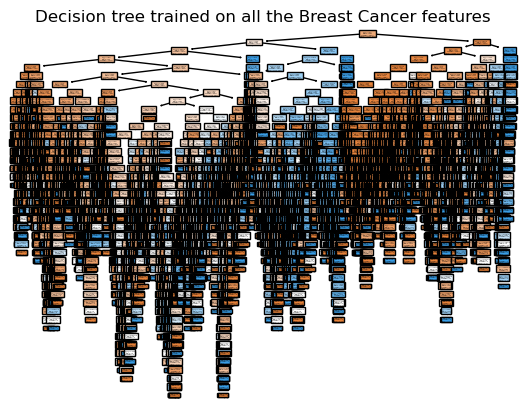

In [39]:
clf=DecisionTreeClassifier()
clf = clf.fit(x1_train,y1_train)
clf.score(x1_train,y1_train)
predict=clf.predict(x1_test)
clf.score(x1_test,y1_test)



plt.figure()
tree.plot_tree(clf, filled=True) #filled=True套色
plt.title("Decision tree trained on all the Breast Cancer features")
plt.show()


In [40]:
from sklearn.metrics import classification_report
print("決策樹分類績效表: ",classification_report(predict,y1_test,digits=4))

決策樹分類績效表:                precision    recall  f1-score   support

           1     0.8715    0.8759    0.8737      7376
           2     0.6115    0.6018    0.6066      2393

    accuracy                         0.8088      9769
   macro avg     0.7415    0.7389    0.7401      9769
weighted avg     0.8078    0.8088    0.8083      9769



In [41]:

path = clf.cost_complexity_pruning_path(x1_train, y1_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

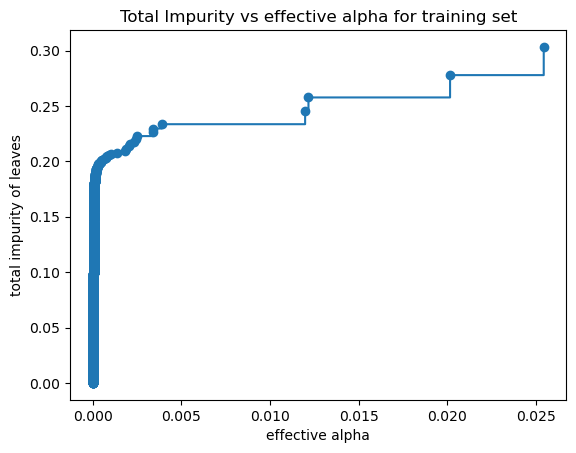

In [42]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [43]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x1_train, y1_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06033443244357717


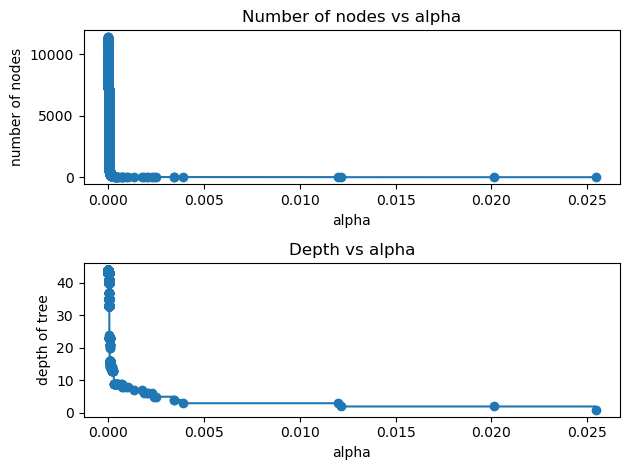

In [44]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

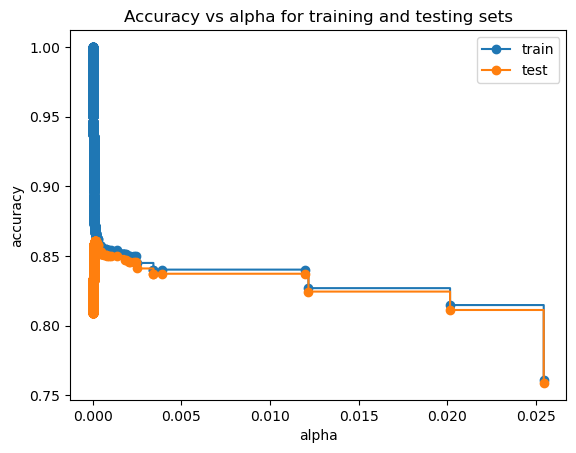

In [45]:
train_scores = [clf.score(x1_train, y1_train) for clf in clfs]
test_scores = [clf.score(x1_test, y1_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

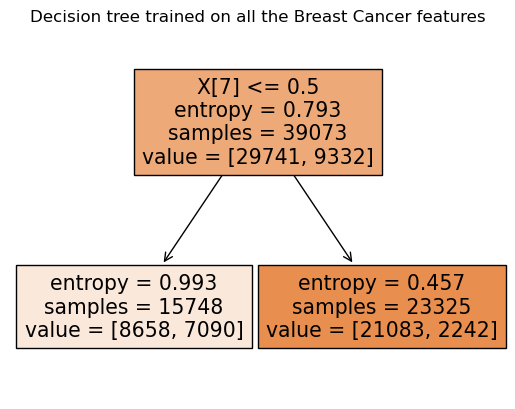

In [46]:
clf=DecisionTreeClassifier(criterion = 'entropy', max_depth=6,ccp_alpha=0.12) #修改ccp_alpha參數
clf = clf.fit(x1_train,y1_train)
clf.score(x1_train,y1_train)
predict2=clf.predict(x1_test)
clf.score(x1_test,y1_test)



plt.figure()
tree.plot_tree(clf, filled=True) #filled=True套色
plt.title("Decision tree trained on all the Breast Cancer features")
plt.show()

In [36]:
from sklearn.metrics import classification_report
print("決策樹分類績效表: ",classification_report(predict2,y1_test,digits=4))

決策樹分類績效表:                precision    recall  f1-score   support

           1     1.0000    0.7589    0.8629      9769
           2     0.0000    0.0000    0.0000         0

    accuracy                         0.7589      9769
   macro avg     0.5000    0.3795    0.4315      9769
weighted avg     1.0000    0.7589    0.8629      9769



C:\Users\BOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\BOB\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
df_outer = x1_test.join(y1_test, how='outer')
df_outer['predict'] = clf.predict(x1_test)
df_outer['result'] = (df_outer['label'] == df_outer['predict'])
df_outer.to_excel("entropy_max3.v2.xlsx")



PermissionError: [Errno 13] Permission denied: 'entropy_max3.v2.xlsx'